# PD7
Kacper Grzymkowski

Zadaniem jest poprawienie wykresu stworzonego na pracę domową 2.

Oryginalny wykres: 
[Link do źródła](https://www.reddit.com/r/dataisbeautiful/comments/j7yfqb/oc_car_color_distribution_broken_down_by/)
![oryginalny](original.jpg)


ulepszone z PD2:
![improved](improved.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("cars_imp.csv")
# nie mogłem znależć porządnej funkcji, która by to robiła więc robię własną
def match_multiple(series, arr):
    out = series.str.contains(arr[0])
    for el in arr:
        out = out | series.str.contains(el)
    return out
df["Grayscale"] = match_multiple(df["Color"], ["White", "Gray", "Silver", "Black"])
#grp = df.groupby("Grayscale")
#grayscale = grp.get_group(True)
#colorful = grp.get_group(False)

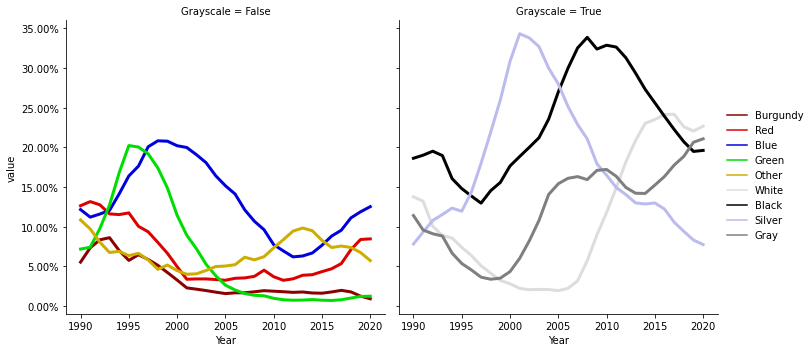

In [4]:
#colarr = ["#8B0000", "#FF0000", "#0000FF", "#00FF00", "#CDAD00", "#EEEEEE", "#000000", "#BBBBEE", "#7F7F7F"]
coldict = {"Burgundy":"#8B0000", "Red":"#DD0000", "Blue":"#0000DD",
           "Green":"#00DD00", "Other":"#CDAD00", "White":"#DDDDDD",
           "Black":"#000000", "Silver":"#BBBBEE", "Gray":"#7F7F7F"}
g = sns.FacetGrid(df, col="Grayscale", height=5)
g.map(sns.lineplot, "Year", "value", "Color", palette=coldict, linewidth=3)

fmt = matplotlib.ticker.PercentFormatter(xmax=1.0, decimals=2)
g.axes[0][0].yaxis.set_major_formatter(fmt)
g.add_legend()

plt.show()

Rozbiłem jeden wykresy na dwa, żeby było mniej spaghetti. Załagodziłem trochę kolory, żeby były bardziej przyjazne oczom. Zmieniłem kolor srebrnego na bardziej niebieskawy, żeby łatwiej było odróżniać poszczególne "szare kolory".

Wiem, że nie jest jakieś bardzo ambitne podejście, ale Seaborn bardzo nie chciał współpracować z customowymi paletami, a FacetGrid.map() jest słabo udokumentowany (albo ja nie rozumiem tej dokumentacji, co też jest możliwe).